Kaggle link

https://www.kaggle.com/datasets/shivan118/big-mart-sales-prediction-datasets

About Dataset

**Sales Prediction for Big Mart Outlets**

Indented blockThe data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

**Importing required libraies**

In [1]:
# importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import itertools

**Importing Train DataSet**

In [3]:
# loading the data from csv file to a pandas dataframe

df_train = pd.read_csv('/content/Train _sales.csv')

In [4]:
# printing the first 5 columns of the dataframe
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# last 5 rows of the dataframe
df_train.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [6]:
# number of rows & columns in the dataframe
df_train.shape

(8523, 12)

**statistical information**

In [7]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800



**Checking the outlayers in the data by using the Boxplot**

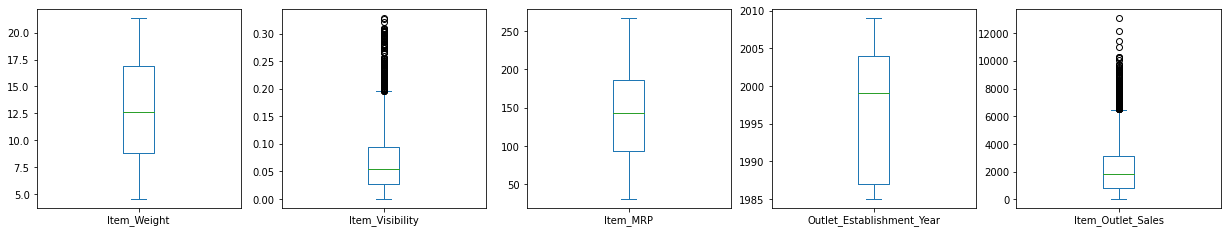

In [8]:
#to plot the outliers
import matplotlib.pyplot as plt
df_train.plot(kind='box',subplots=True,layout=(7,7),figsize=(30,30))
plt.show()

**Exploratory Data Analysis**

In [9]:
df_train.shape

(8523, 12)

In [10]:
obj = (df_train.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (df_train.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (df_train.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 7
Integer variables: 1
Float variables: 4


In [11]:
df_train.dtypes #dtypes is to know what type of data it is

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [12]:
# checking for missing values
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)

In [14]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)

In [16]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

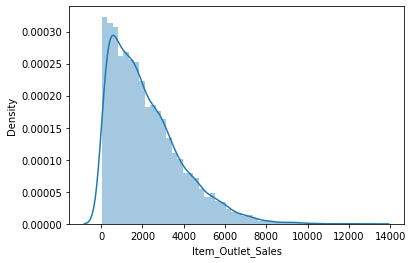



skewness: 1.177531
kurtosis: 1.615877


In [17]:
# Skewness is a measure of symmetry, or more precisely, the lack of symmetry.
# A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. 
# Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

#kernel density plot
sns.distplot(df_train.Item_Outlet_Sales)
plt.show()
print('\n')
print("skewness: %f" % df_train ["Item_Outlet_Sales" ].skew())
print("kurtosis: %f" % df_train ["Item_Outlet_Sales" ].kurt())

In [18]:
#descriptuve statistics summary of target variable
df_train['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

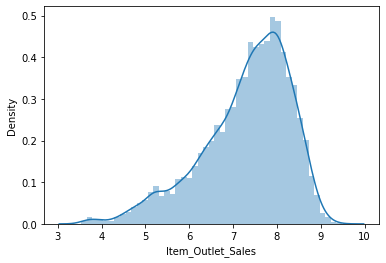

skewness: -0.882266
kurtosis: 0.532920


In [19]:
#log transformation used to transform skwed data to approximately conform to normality

#log transform the target
df_train["Item_Outlet_Sales"] =np.log1p(df_train["Item_Outlet_Sales"])

#kernel Density plot
sns.distplot(df_train.Item_Outlet_Sales);
plt.show()

print("skewness: %f" % df_train["Item_Outlet_Sales"].skew())
print("kurtosis: %f" % df_train["Item_Outlet_Sales"].kurt())


In [20]:
df_train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [21]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace({'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'})
df_train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

<Axes: xlabel='Outlet_Size'>

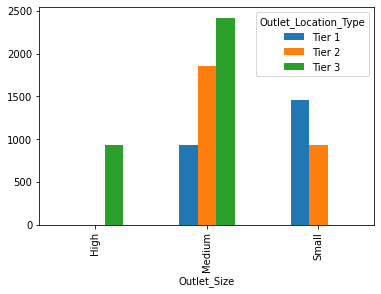

In [22]:
df_train.groupby(['Outlet_Size','Outlet_Location_Type']).size().unstack().plot(kind = 'bar')
     

<Axes: xlabel='Outlet_Type'>

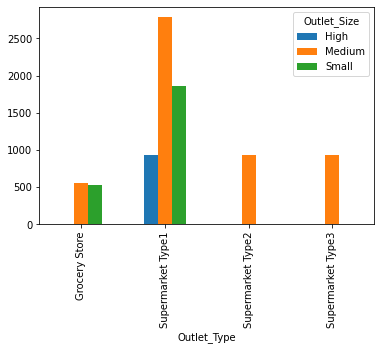

In [23]:
df_train.groupby('Outlet_Type')['Outlet_Size'].value_counts().unstack().plot(kind ='bar')

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

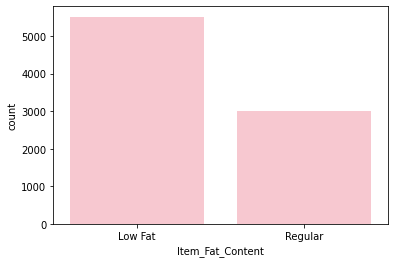

In [24]:
sns.countplot(x='Item_Fat_Content', data=df_train, color='pink')
     

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

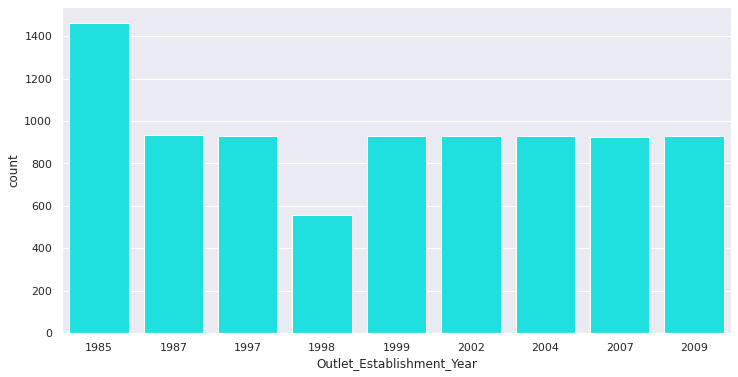

In [25]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Outlet_Establishment_Year', data=df_train, color='aqua')

**Checking correlation and visualizing it**

In [26]:
df_train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.008059
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.192996
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.509886
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,0.077032
Item_Outlet_Sales,0.008059,-0.192996,0.509886,0.077032,1.000000


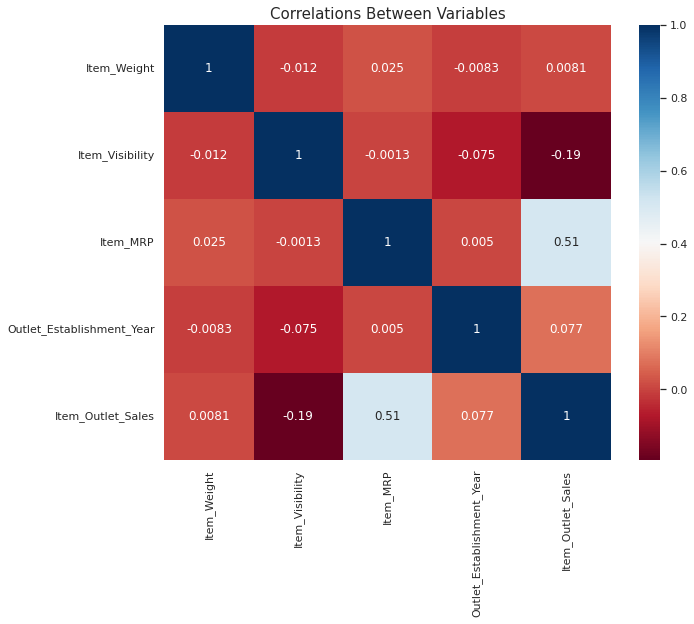

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(), cmap="RdBu",annot=True)
plt.title("Correlations Between Variables", size=15)
plt.show() #'RdBu' says take red to blue and having white in the middle , Red is negatively correlated and Blue is positively correlated

In [28]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [29]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,8.225808
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,6.096776
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,7.648868
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,6.597664
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,6.903451
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,7.929984
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,6.310436
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,7.085159
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,7.521100


In [30]:
num=df_train._get_numeric_data() 
num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,8.225808
1,5.92,0.019278,48.2692,2009,6.096776
2,17.50,0.016760,141.6180,1999,7.648868
3,19.20,0.000000,182.0950,1998,6.597664
4,8.93,0.000000,53.8614,1987,6.903451


In [31]:
cat=df_train.drop(num,axis=1)
cat.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,Medium,Tier 3,Grocery Store
4,Low Fat,Household,High,Tier 3,Supermarket Type1


In [32]:
df_dummies =pd.get_dummies(cat)
df_dummies


,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
8520,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [33]:
final_data=num.join(df_dummies)
final_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,8.225808,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,6.096776,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,7.648868,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,6.597664,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,6.903451,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [34]:
final_data.shape

(8523, 33)

**Splitting Data into Train and Test**

In [35]:
## Dividing Independent and Dependent Variables
X = final_data.drop('Item_Outlet_Sales', axis=1)
y = final_data['Item_Outlet_Sales']

In [36]:
print(X.shape)
X.head()

(8523, 32)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [37]:
print(y.shape)
y.head()

(8523,)


0    8.225808
1    6.096776
2    7.648868
3    6.597664
4    6.903451
Name: Item_Outlet_Sales, dtype: float64

In [38]:
# Split the data into training and validation sets
train_size = int(len(final_data) * 0.7) # 70% of the data is used for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Print the size of each set
print('Training data:', len(X_train))
print('test data:', len(X_test))

Training data: 5966
test data: 2557


In [39]:
class DecisionTreeRegressor:
    def __init__(self, max_depth=2):
        self.max_depth = max_depth
    
    def fit(self, X, y):
        self.tree = self.build_tree(X, y, depth=0)
        
    def build_tree(self, X, y, depth):
        n_samples, n_features = X.shape
        
        if depth == self.max_depth or n_samples == 5:
            return np.mean(y)
        
        feature_idxs = np.random.choice(n_features, size=2, replace=False)
        best_feature, best_threshold = self.find_best_split(X, y, feature_idxs)
        
        if best_threshold is None:
            return np.mean(y)
        
        left_idxs = X[:, best_feature] < best_threshold
        right_idxs = X[:, best_feature] >= best_threshold
        
        left_tree = self.build_tree(X[left_idxs], y[left_idxs], depth+1)
        right_tree = self.build_tree(X[right_idxs], y[right_idxs], depth+1)
        
        return (best_feature, best_threshold, left_tree, right_tree)
    
    def find_best_split(self, X, y, feature_idxs):
        best_score = float('inf')
        best_feature = None
        best_threshold = None
        
        for feature in feature_idxs:
            thresholds = np.unique(X[:, feature])
            
            for threshold in thresholds:
                left_idxs = X[:, feature] < threshold
                right_idxs = X[:, feature] >= threshold
                
                if np.sum(left_idxs) == 0 or np.sum(right_idxs) == 0:
                    continue
                
                score = self.split_score(y, y[left_idxs], y[right_idxs])
                
                if score < best_score:
                    best_score = score
                    best_feature = feature
                    best_threshold = threshold
                    
        return best_feature, best_threshold
    
    def split_score(self, y, y_left, y_right):
        p_left = len(y_left) / len(y)
        p_right = len(y_right) / len(y)
        
        score = p_left * np.var(y_left) + p_right * np.var(y_right)
        
        return score
    
    def predict(self, X):
        return np.array([self.traverse_tree(x, self.tree) for x in X])
    
    def traverse_tree(self, x, node):
        if isinstance(node, float):
            return node
        
        feature, threshold, left_tree, right_tree = node
        
        if x[feature] < threshold:
            if isinstance(left_tree,float):
                return left_tree
            else:
                return self.traverse_tree(x, right_tree)
        else:
            if isinstance(right_tree,float):
                return right_tree
            else:
                return self.traverse_tree(x,right_tree)
        
class RandomForestRegressor:
    def __init__(self, n_trees=15, max_depth=2, subsample_size=0.5):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.subsample_size = subsample_size
        self.trees = []
        
    def fit(self, X, y):
        for i in range(self.n_trees):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            n_samples = len(X)
            subsample_size = int(self.subsample_size * n_samples)
            subsample_idxs = np.random.choice(range(n_samples), size=subsample_size, replace=True)
            X_sub = X.iloc[subsample_idxs]
            y_sub = y.iloc[subsample_idxs]
            tree.fit(X_sub.values, y_sub.values)
            #tree.fit(X[subsample_idxs], y[subsample_idxs])
            self.trees.append(tree)
            
    def predict(self, X):
        if isinstance(X, (int, float)):
            X = np.array([[X]])
        elif isinstance(X, pd.Series):
            X = X.values.reshape(1, n_features)
        else:
            X = X.values
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)

In [40]:
rf = RandomForestRegressor(n_trees=15, max_depth=2, subsample_size=0.5)
rf.fit(X_train, y_train)

In [41]:
class GridSearchCV:
    def __init__(self, estimator, param_grid, cv=5):
        self.estimator = estimator
        self.param_grid = param_grid
        self.cv = cv
    
    def fit(self, X, y):
        param_combinations = list(itertools.product(*self.param_grid.values()))
        best_params = None
        best_score = float('inf')
        for params in param_combinations:
            param_dict = dict(zip(self.param_grid.keys(), params))
            estimator = self.estimator(**param_dict)
            scores = []
            n_samples = len(X)
            fold_size = n_samples // self.cv
            for i in range(self.cv):
                start = i * fold_size
                end = (i+1) * fold_size if i != self.cv-1 else n_samples
                X_train = pd.concat([X.iloc[:start], X.iloc[end:]])
                y_train = pd.concat([y.iloc[:start], y.iloc[end:]])
                X_test = X.iloc[start:end]
                y_test = y.iloc[start:end]
                estimator.fit(X_train, y_train)
                y_pred = estimator.predict(X_test)
                score = np.mean((y_test - y_pred)**2)
                scores.append(score)
            avg_score = np.mean(scores)
            if avg_score < best_score:
                best_score = avg_score
                best_params = param_dict
        self.best_params_ = best_params
        self.best_estimator_ = self.estimator(**best_params)
        self.best_estimator_.fit(X, y)
        self.cv_results_ = {'params': [], 'mean_test_score': []}
        for params in param_combinations:
            param_dict = dict(zip(self.param_grid.keys(), params))
            self.cv_results_['params'].append(param_dict)
            estimator = self.estimator(**param_dict)
            scores = []
            n_samples = len(X)
            fold_size = n_samples // self.cv
            for i in range(self.cv):
                start = i * fold_size
                end = (i+1) * fold_size if i != self.cv-1 else n_samples
                X_train = pd.concat([X.iloc[:start], X.iloc[end:]])
                y_train = pd.concat([y.iloc[:start], y.iloc[end:]])
                X_test = X.iloc[start:end]
                y_test = y.iloc[start:end]
                estimator.fit(X_train, y_train)
                y_pred = estimator.predict(X_test)
                score = np.mean((y_test - y_pred)**2)
                scores.append(score)
            avg_score = np.mean(scores)
            self.cv_results_['mean_test_score'].append(avg_score)
        return self

# Define the parameter grid
param_grid = {
    'n_trees': [10, 20],
    'max_depth': [2, 4],
    'subsample_size': [0.5, 0.7]
}

# Define the estimator
estimator = RandomForestRegressor

# Perform grid search
grid_search = GridSearchCV(estimator, param_grid)
grid_search.fit(X_train, y_train)

# Print results
print("Best parameters:", grid_search.best_params_)
print("Best score:", np.mean((y_test - grid_search.best_estimator_.predict(X_test))**2))
print("CV results:", grid_search.cv_results_)

Best parameters: {'n_trees': 20, 'max_depth': 2, 'subsample_size': 0.7}
Best score: 0.9174809386537317
CV results: {'params': [{'n_trees': 10, 'max_depth': 2, 'subsample_size': 0.5}, {'n_trees': 10, 'max_depth': 2, 'subsample_size': 0.7}, {'n_trees': 10, 'max_depth': 4, 'subsample_size': 0.5}, {'n_trees': 10, 'max_depth': 4, 'subsample_size': 0.7}, {'n_trees': 20, 'max_depth': 2, 'subsample_size': 0.5}, {'n_trees': 20, 'max_depth': 2, 'subsample_size': 0.7}, {'n_trees': 20, 'max_depth': 4, 'subsample_size': 0.5}, {'n_trees': 20, 'max_depth': 4, 'subsample_size': 0.7}], 'mean_test_score': [0.9853755156214936, 0.9717018653443485, 0.9841732618050052, 1.0473675535379052, 0.9602822249325568, 0.9027497853593782, 1.0049211629679664, 1.0651975272923309]}


In [42]:
# Make predictions on the train set
y_train_pred = rf.predict(X_train)

# Calculate mean absolute error
mae_train = np.abs(y_train.values - y_train_pred).mean()

# Calculate mean absolute error
print("Mean Absolute Error:", mae_train)


Mean Absolute Error: 0.8371205851878193


In [43]:
# Make predictions on the test set
y_test_pred = rf.predict(X_test)

# Calculate mean absolute error
mae_test = np.abs(y_test.values - y_test_pred).mean()

# Calculate mean absolute error
print("Mean Absolute Error:", mae_test)


Mean Absolute Error: 0.8460449187291154


**Handling test data**

In [45]:
df_test= pd.read_csv("/content/Test _sales.csv")

In [46]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [47]:
df_test.shape

(5681, 11)

In [48]:
#statistical information
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,4705.0,12.695633,4.664849,4.555,8.645000,12.500000,16.700000,21.350000
Item_Visibility,5681.0,0.065684,0.051252,0.000,0.027047,0.054154,0.093463,0.323637
Item_MRP,5681.0,141.023273,61.809091,31.990,94.412000,141.415400,186.026600,266.588400
Outlet_Establishment_Year,5681.0,1997.828903,8.372256,1985.000,1987.000000,1999.000000,2004.000000,2009.000000


In [49]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [50]:
df_test.dtypes #dtypes is to know what type of data it is

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [51]:
df_test.Item_Fat_Content.unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [52]:
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace({'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'})
df_test.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [53]:
df_test['Item_Weight'].describe()

count    4705.000000
mean       12.695633
std         4.664849
min         4.555000
25%         8.645000
50%        12.500000
75%        16.700000
max        21.350000
Name: Item_Weight, dtype: float64

In [54]:
df_test['Item_Weight'].fillna(df_test['Item_Weight'].median(),inplace=True)
     

In [55]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [56]:
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)
     

In [57]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [58]:
df_test.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.018342,0.045048,0.025678
Item_Visibility,-0.018342,1.000000,-0.014013,-0.097040
Item_MRP,0.045048,-0.014013,1.000000,-0.007233
Outlet_Establishment_Year,0.025678,-0.097040,-0.007233,1.000000


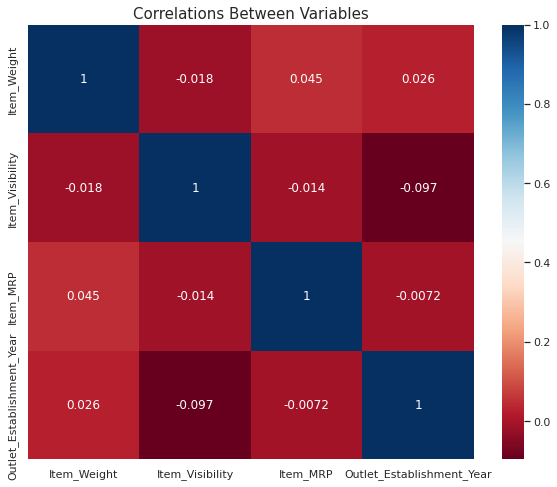

In [59]:
plt.figure(figsize=(10,8))
sns.heatmap(df_test.corr(), cmap="RdBu",annot=True)
plt.title("Correlations Between Variables", size=15)
plt.show() #'RdBu' says take red to blue and having white in the middle , Red is negatively correlated and Blue is positively correlated
     

In [60]:
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [61]:
test_num=df_test._get_numeric_data() 
test_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,20.750,0.007565,107.8622,1999
1,8.300,0.038428,87.3198,2007
2,14.600,0.099575,241.7538,1998
3,7.315,0.015388,155.0340,2007
4,12.500,0.118599,234.2300,1985


In [62]:
test_cat=df_test.drop(test_num,axis=1)
test_cat.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Snack Foods,Medium,Tier 1,Supermarket Type1
1,Regular,Dairy,Medium,Tier 2,Supermarket Type1
2,Low Fat,Others,Medium,Tier 3,Grocery Store
3,Low Fat,Snack Foods,Medium,Tier 2,Supermarket Type1
4,Regular,Dairy,Medium,Tier 3,Supermarket Type3


In [63]:
dum=pd.get_dummies(test_cat)
dum.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [64]:
final_test_data=test_num.join(dum)
final_test_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750,0.007565,107.8622,1999,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,8.300,0.038428,87.3198,2007,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,14.600,0.099575,241.7538,1998,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,7.315,0.015388,155.0340,2007,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,12.500,0.118599,234.2300,1985,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [65]:
# get the predictions
y_pred_test = rf.predict(final_test_data)

# print the predictions
print(y_pred_test)

[7.18912664 7.07327731 7.17907128 ... 7.11792002 7.11753697 7.06204988]


In [66]:
# convert the array to a DataFrame
df = pd.DataFrame(y_pred_test)

# print the DataFrame
df.head()

,0
0,7.189127
1,7.073277
2,7.179071
3,7.143695
4,7.073277


In [67]:
df.columns = ["Outlet_Sales"]

In [68]:
final_test=pd.concat([df_test,df],axis=1)

In [69]:
final_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Sales
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1,7.189127
1,8.300,Regular,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1,7.073277
2,14.600,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store,7.179071
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1,7.143695
4,12.500,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3,7.073277
